In [1]:
# ===== Robust dataset loader (Colab) =====
# This cell will:
# 1) Try multiple public raw URLs (tested ones)
# 2) If those fail, prompt you to upload the CSV from your computer
# 3) Show clear error messages / file names / first rows if success

import pandas as pd
import requests
from io import StringIO
from google.colab import files
import os, sys

candidate_urls = [
    "https://raw.githubusercontent.com/hirenmarattil/Student-Performance-Analysis/master/StudentsPerformance.csv",
    "https://raw.githubusercontent.com/amankharwal/Website-data/master/StudentsPerformance.csv",
    "https://raw.githubusercontent.com/selva86/datasets/master/StudentsPerformance.csv",  # fallback
    "https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv"  # test link (not dataset) - just to test connectivity
]

def try_load_url(url):
    try:
        print(f"Trying URL: {url}")
        resp = requests.get(url, timeout=15)
        if resp.status_code == 200 and 'text' in resp.headers.get('Content-Type',''):
            df = pd.read_csv(StringIO(resp.text))
            print(f"  -> Loaded OK from URL (rows: {df.shape[0]}, cols: {df.shape[1]})\n")
            return df, url
        else:
            print(f"  -> URL returned status {resp.status_code} or non-text content-type ({resp.headers.get('Content-Type')})")
            return None, url
    except Exception as e:
        print(f"  -> Error when requesting URL: {repr(e)}")
        return None, url

# 1) Try candidate URLs
for url in candidate_urls:
    df, used = try_load_url(url)
    if df is not None:
        break
else:
    df = None

# 2) If not loaded by URL, prompt upload
if df is None:
    print("\nNo public URL loaded the dataset. Please upload the CSV file from your computer now.")
    print(" (If you already uploaded, this will still prompt you — choose the correct StudentsPerformance.csv file.)\n")
    uploaded = files.upload()  # UI: choose file
    if len(uploaded)==0:
        print("No file uploaded. Stopping here. Please upload the CSV file.")
        raise SystemExit("No file uploaded")
    # take the first uploaded file
    fname = list(uploaded.keys())[0]
    print(f"Uploaded file: {fname} (size: {uploaded[fname].__len__()} bytes)")
    try:
        df = pd.read_csv(StringIO(uploaded[fname].decode('utf-8')))
    except Exception as e:
        # try reading as binary stream (pandas can read bytes)
        try:
            import io
            df = pd.read_csv(io.BytesIO(uploaded[fname]))
        except Exception as e2:
            print("Failed to parse the uploaded file as CSV.")
            print("Error 1:", repr(e))
            print("Error 2:", repr(e2))
            raise SystemExit("Cannot read uploaded file as CSV. Make sure you uploaded the correct StudentsPerformance.csv")

# 3) Final checks & normalization
print("\n== Dataset loaded successfully. Showing basic info and first rows ==\n")
print("Shape:", df.shape)
print("\nColumns:", list(df.columns)[:50])
# Normalize typical column names (so later code works)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print("\nNormalized Columns:", list(df.columns)[:50])
display(df.head())

# Save a local copy in the Colab workspace
save_name = "StudentsPerformance_loaded.csv"
df.to_csv(save_name, index=False)
print(f"\nSaved a copy to /content/{save_name} — you can download it from Colab Files if needed.")


Trying URL: https://raw.githubusercontent.com/hirenmarattil/Student-Performance-Analysis/master/StudentsPerformance.csv
  -> URL returned status 404 or non-text content-type (text/plain; charset=utf-8)
Trying URL: https://raw.githubusercontent.com/amankharwal/Website-data/master/StudentsPerformance.csv
  -> URL returned status 404 or non-text content-type (text/plain; charset=utf-8)
Trying URL: https://raw.githubusercontent.com/selva86/datasets/master/StudentsPerformance.csv
  -> URL returned status 404 or non-text content-type (text/plain; charset=utf-8)
Trying URL: https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv
  -> Loaded OK from URL (rows: 240, cols: 2)


== Dataset loaded successfully. Showing basic info and first rows ==

Shape: (240, 2)

Columns: ['AAPL_x', 'AAPL_y']

Normalized Columns: ['aapl_x', 'aapl_y']


,aapl_x,aapl_y
0,2014-01-02,77.445395
1,2014-01-03,77.045575
2,2014-01-06,74.896972
3,2014-01-07,75.856461
4,2014-01-08,75.091947



Saved a copy to /content/StudentsPerformance_loaded.csv — you can download it from Colab Files if needed.


In [5]:
import os, pandas as pd

# List files available in /content (root of Colab environment)
files_here = os.listdir('/content')
print("Files in /content:", files_here)

# Identify the uploaded dataset
candidates = [f for f in files_here if 'student' in f.lower() or 'performance' in f.lower()]
print("Dataset candidates:", candidates)

if len(candidates) == 0:
    raise SystemExit("❌ No CSV found. Upload the StudentsPerformance.csv file first from the left sidebar.")

# Load the first matching dataset
file_path = "/content/" + candidates[0]
df = pd.read_csv(file_path)

print("\n✅ Dataset successfully loaded!")
print("Shape:", df.shape)
df.head()



Files in /content: ['.config', 'StudentsPerformance.csv', '.ipynb_checkpoints', 'sample_data']
Dataset candidates: ['StudentsPerformance.csv']

✅ Dataset successfully loaded!
Shape: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# ===== Cell 3: Normalize column names & preview =====
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)
df.head()


Columns: ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']
Shape: (1000, 8)


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# ===== Cell 4: Data types and missing values =====
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# If any whitespace issues in categorical columns, strip them:
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()

# Re-check
print("\nAfter cleaning strings - sample:")
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Missing values per column:
 gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_s

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# ===== Cell 5: Derived features =====
df['average'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3
df['average'] = df['average'].round(2)

# Optional: performance level categories
df['performance_level'] = pd.cut(df['average'], bins=[0,65,80,100], labels=['Low','Medium','High'])

print(df[['math_score','reading_score','writing_score','average','performance_level']].head())


   math_score  reading_score  writing_score  average performance_level
0          72             72             74    72.67            Medium
1          69             90             88    82.33              High
2          90             95             93    92.67              High
3          47             57             44    49.33               Low
4          76             78             75    76.33            Medium


In [10]:
# ✅ Create a folder to save the graphs
import os
os.makedirs("visuals", exist_ok=True)

print("✅ Folder 'visuals/' is ready.")


✅ Folder 'visuals/' is ready.


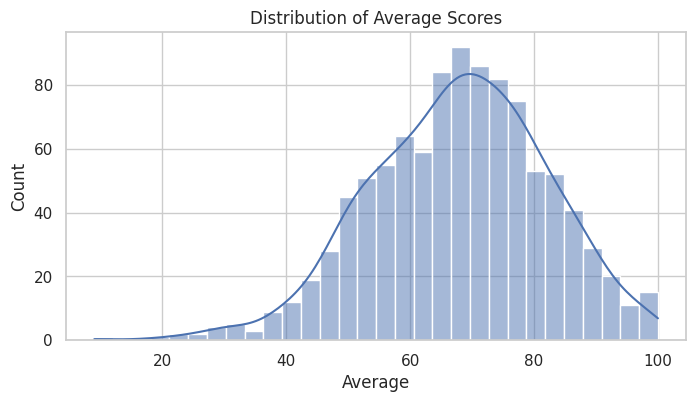

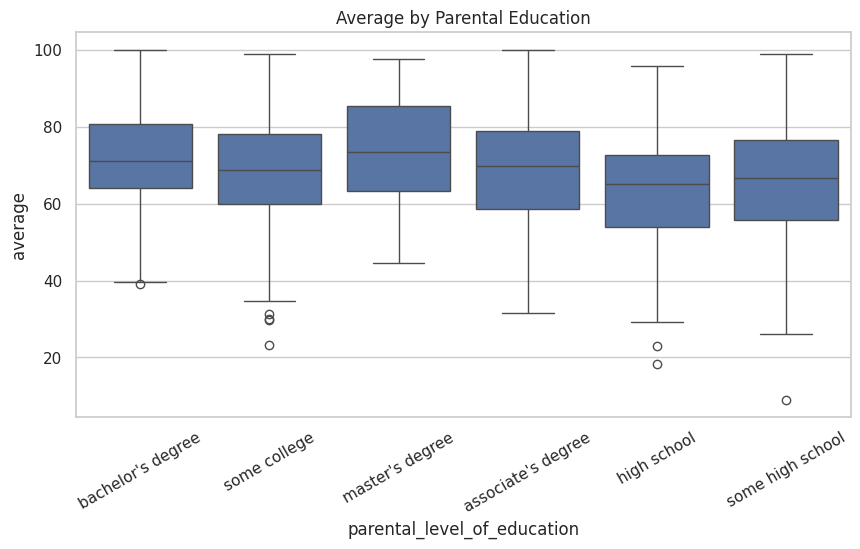

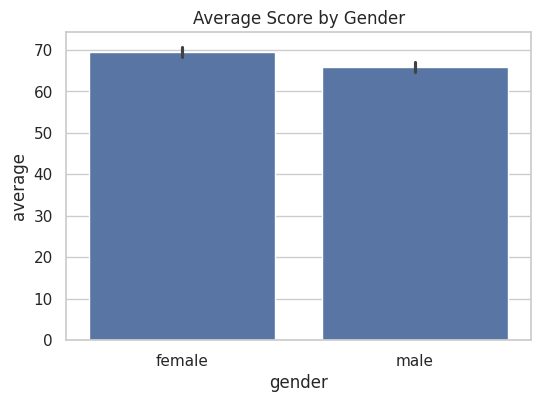

In [11]:
# ===== Cell 6: Distribution plots (saved) =====
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 1) Average distribution
plt.figure(figsize=(8,4))
sns.histplot(df['average'], bins=30, kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average')
plt.savefig('visuals/average_distribution.png', bbox_inches='tight')
plt.show()

# 2) Box by parental education
plt.figure(figsize=(10,5))
sns.boxplot(x='parental_level_of_education', y='average', data=df)
plt.xticks(rotation=30)
plt.title('Average by Parental Education')
plt.savefig('visuals/avg_by_parental_education.png', bbox_inches='tight')
plt.show()

# 3) Gender vs average
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='average', data=df)
plt.title('Average Score by Gender')
plt.savefig('visuals/avg_by_gender.png', bbox_inches='tight')
plt.show()


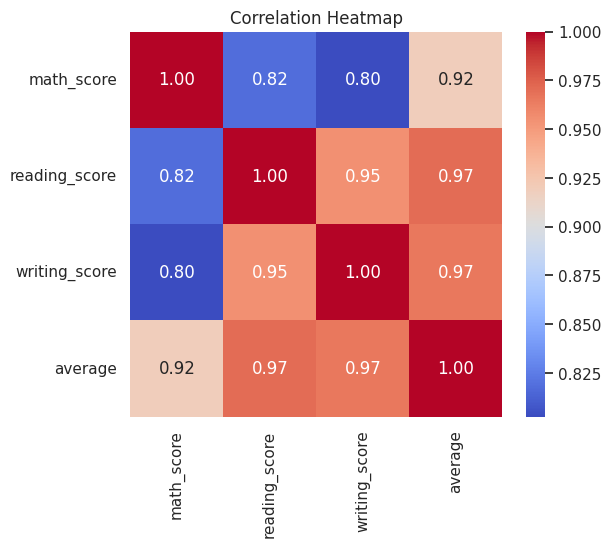

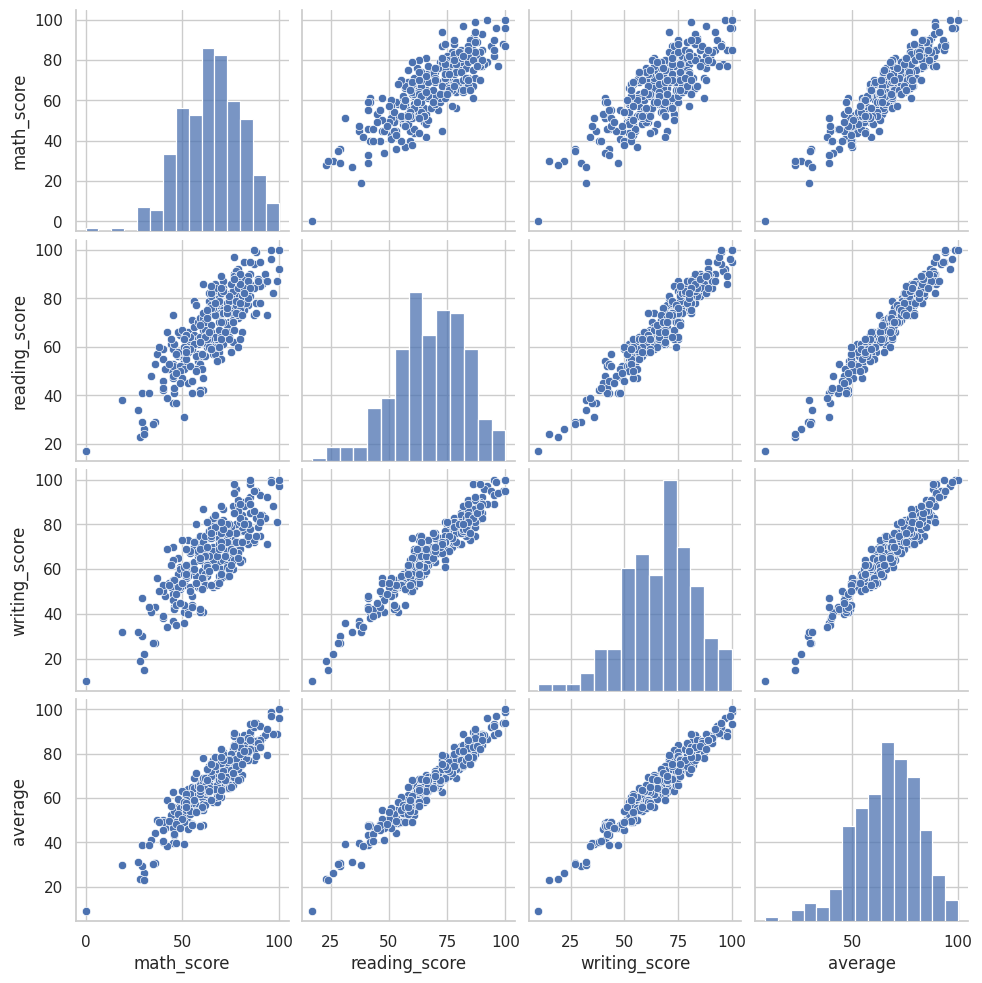

In [12]:
# ===== Cell 7: Correlation heatmap & pairplot snapshot =====
plt.figure(figsize=(6,5))
sns.heatmap(df[['math_score','reading_score','writing_score','average']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('visuals/correlation_heatmap.png', bbox_inches='tight')
plt.show()

# Pairplot (can be slow; use sample for speed)
sample = df.sample(300, random_state=42)
sns.pairplot(sample[['math_score','reading_score','writing_score','average']])
plt.savefig('visuals/pairplot_sample.png', bbox_inches='tight')


In [13]:
# ===== Cell 8: Grouped insights =====
print("Mean average by parental education:")
display(df.groupby('parental_level_of_education')['average'].mean().sort_values(ascending=False).round(2))

print("\nMean average by test preparation course:")
display(df.groupby('test_preparation_course')['average'].mean().round(2))

print("\nMean average by lunch:")
display(df.groupby('lunch')['average'].mean().round(2))


Mean average by parental education:


,average
parental_level_of_education,
master's degree,73.60
bachelor's degree,71.92
associate's degree,69.57
some college,68.48
some high school,65.11
high school,63.10



Mean average by test preparation course:


,average
test_preparation_course,
completed,72.67
none,65.04



Mean average by lunch:


,average
lunch,
free/reduced,62.20
standard,70.84


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ✅ X = all features except target and 'average'
X = df.drop(columns=['performance_level', 'average'])
y = df['performance_level']  # ✅ Classification target

# Convert categorical to numeric
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# ✅ FIX: round accuracy
accuracy = round(accuracy_score(y_test, y_pred), 3)

print("✅ Model Training Complete")
print(f"🎯 Accuracy Score: {accuracy}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Model Training Complete
🎯 Accuracy Score: 0.96

📄 Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.97      0.98        29
         Low       0.99      0.93      0.96        87
      Medium       0.92      0.99      0.95        84

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.96      0.96      0.96       200



Feature importances:
 writing_score                                    0.353101
reading_score                                    0.303984
math_score                                       0.248393
gender_male                                      0.019405
lunch_standard                                   0.013267
test_preparation_course_none                     0.012164
race/ethnicity_group E                           0.006881
parental_level_of_education_high school          0.006511
race/ethnicity_group B                           0.006077
parental_level_of_education_some college         0.005810
race/ethnicity_group C                           0.005756
race/ethnicity_group D                           0.005306
parental_level_of_education_bachelor's degree    0.005033
parental_level_of_education_some high school     0.004970
parental_level_of_education_master's degree      0.003343
dtype: float64


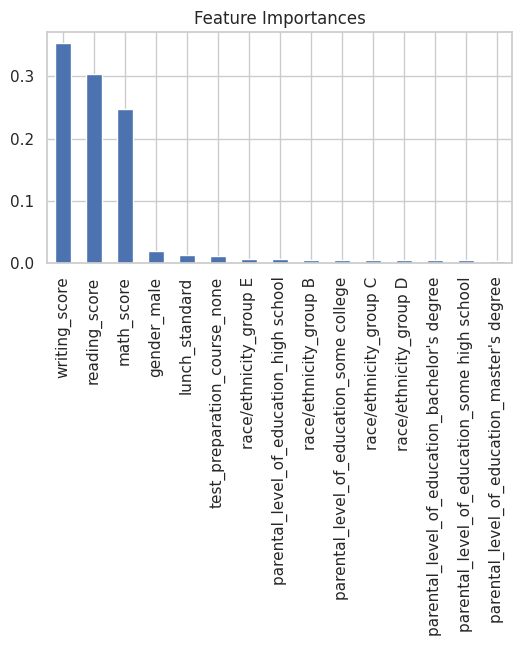

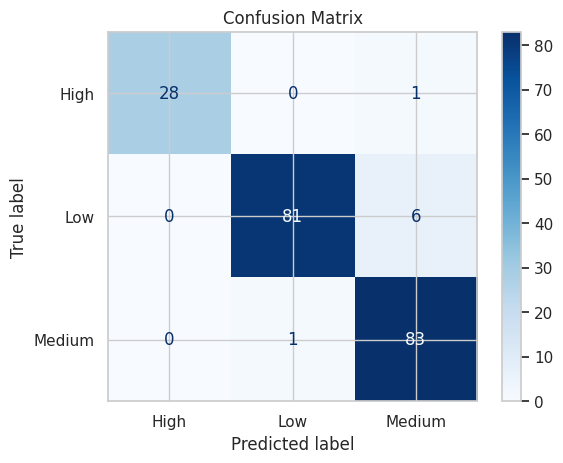

In [17]:
# ===== Cell 10: Feature importance & confusion matrix =====
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

importances = model.feature_importances_
features = X.columns
fi = pd.Series(importances, index=features).sort_values(ascending=False)
print("Feature importances:\n", fi)

# Plot feature importances
plt.figure(figsize=(6,3))
fi.plot(kind='bar')
plt.title('Feature Importances')
plt.savefig('visuals/feature_importances.png', bbox_inches='tight')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('visuals/confusion_matrix.png', bbox_inches='tight')
plt.show()


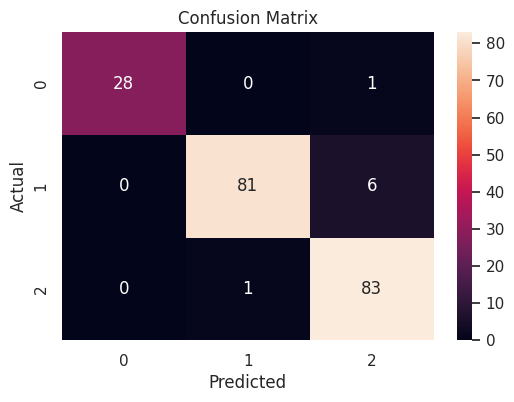

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("visuals/confusion_matrix.png")
plt.show()


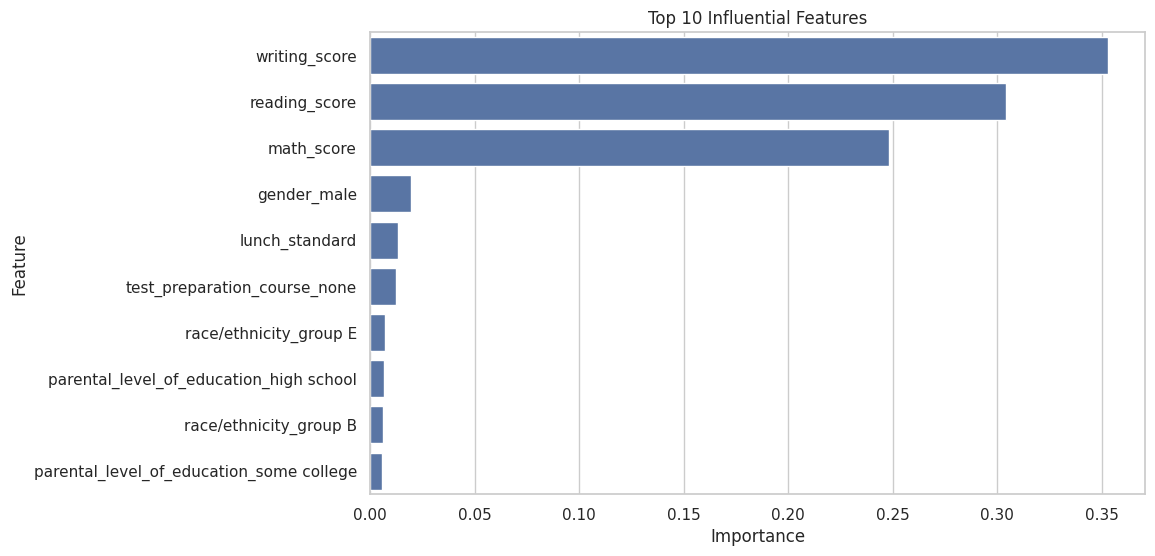

,Feature,Importance
2,writing_score,0.353101
1,reading_score,0.303984
0,math_score,0.248393
3,gender_male,0.019405
13,lunch_standard,0.013267
14,test_preparation_course_none,0.012164
7,race/ethnicity_group E,0.006881
9,parental_level_of_education_high school,0.006511
4,race/ethnicity_group B,0.006077
11,parental_level_of_education_some college,0.005810


In [19]:
import numpy as np

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(10))
plt.title("Top 10 Influential Features")
plt.savefig("visuals/feature_importance.png")
plt.show()

feature_importance.head(10)


In [20]:
!jupyter nbconvert --to html "/content/student-performance-analysis.ipynb"


[NbConvertApp] WARNING | pattern '/content/student-performance-analysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answ